In [10]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random
%matplotlib inline
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.svm import SVC

Mounting from Google Drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


Reading Data

In [13]:
data = pd.read_csv('diabetes.csv')


In [14]:
print("shape",data.shape)
data.head(7)

shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
data_null=data.isnull().sum()
print(data_null)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


 EDA


In [19]:
px.pie(data, names="Outcome")

Pregnencies vs Outcome


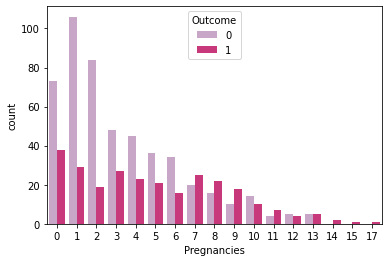

In [21]:
sns.countplot(x="Pregnancies", hue = "Outcome", data=data, palette=random.choice(pallete))

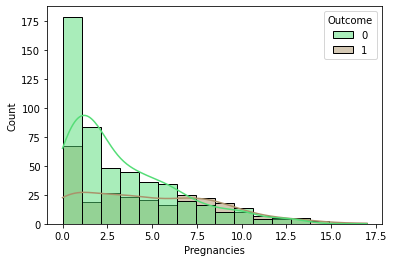

In [23]:
sns.histplot(x="Pregnancies", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

Blood Pressure vs Outcome

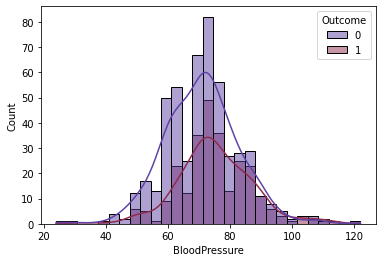

In [ ]:
sns.histplot(x="BloodPressure", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

Glucose vs Outcome

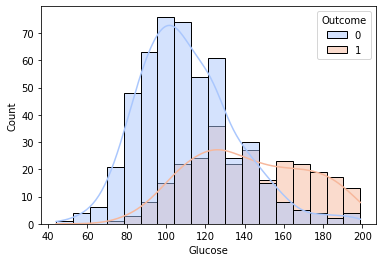

In [ ]:
sns.histplot(x="Glucose", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

Skin Thickness vs Outcome

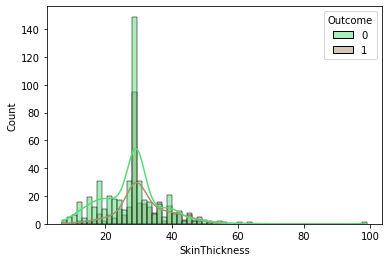

In [ ]:
sns.histplot(x="SkinThickness", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

Insulin vs Outcome

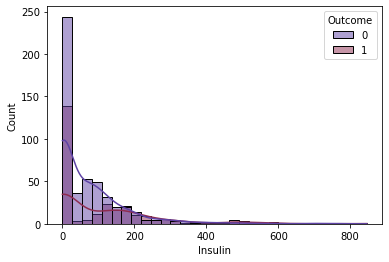

In [24]:
sns.histplot(x="Insulin", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

Age vs Outcome

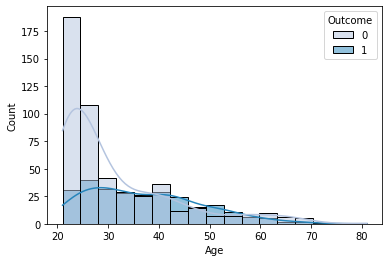

In [26]:
sns.histplot(x="Age", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))


BMI vs Outcome

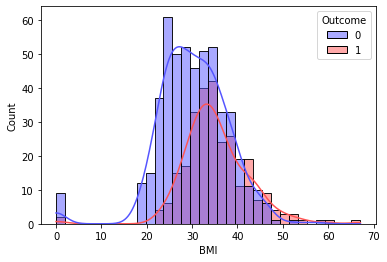

In [27]:
sns.histplot(x="BMI", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

DiabetesPedigreeFunction vs Outcome

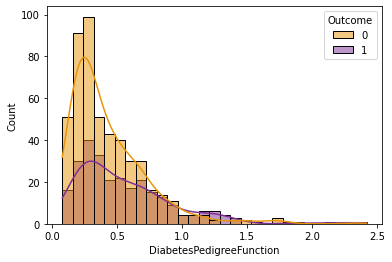

In [28]:
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

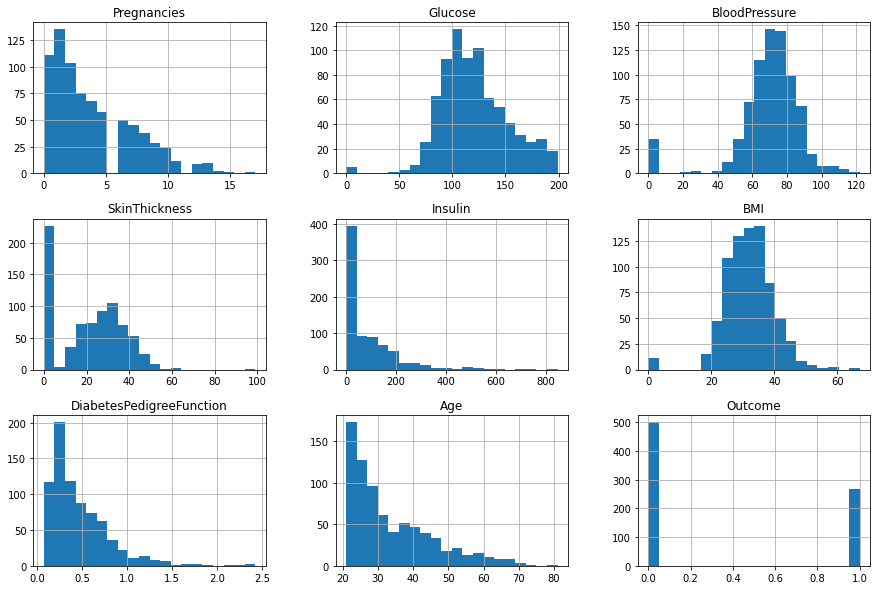

In [ ]:
data.hist(bins=20, figsize=(15,10))
plt.show()

Data Preprocessing

In [30]:
for col in data.columns:
    print("The minimum value for the {} column is {}".format(col, data[col].min()))

The minimum value for the Pregnancies column is 0
The minimum value for the Glucose column is 0
The minimum value for the BloodPressure column is 0
The minimum value for the SkinThickness column is 0
The minimum value for the Insulin column is 0
The minimum value for the BMI column is 0.0
The minimum value for the DiabetesPedigreeFunction column is 0.078
The minimum value for the Age column is 21
The minimum value for the Outcome column is 0


In [31]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [32]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())

Splitting Data

In [33]:
train, test = train_test_split(data, test_size=0.3, random_state=50)
x_train = train.drop(columns='Outcome')
y_train = train['Outcome']

x_val = test.drop(columns='Outcome')
y_val = test['Outcome']

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

Logistic Regression

In [34]:
l = LogisticRegression(solver='liblinear', max_iter=100, C=0.25).fit(x_train, np.ravel(y_train))
y_pred_log= l.predict(x_val)
print('Classification report:\n\n{}'.format(classification_report(y_val, y_pred_log)))
print('The accuracy of the Logistic Regression is', accuracy_score(y_val, y_pred_log))

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       148
           1       0.72      0.51      0.60        83

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

The accuracy of the Logistic Regression is 0.7532467532467533


K Neighbors Classifier

In [37]:
knn = KNeighborsClassifier(n_neighbors = 9).fit(x_train, y_train)
y_pred_knn = knn.predict(x_val)
print('Classification Report:\n\n{}'.format(classification_report(y_val, y_pred_knn)))
print('The accuracy of the KNN is', accuracy_score(y_val, y_pred_knn))

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       148
           1       0.68      0.59      0.63        83

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

The accuracy of the KNN is 0.7532467532467533


SVM

In [38]:
svm = SVC(kernel='rbf', degree=4, C=0.7, probability=True).fit(x_train, np.ravel(y_train))
y_pred_svm = svm.predict(x_val)
print('Classification Report:\n\n{}'.format(classification_report(y_val, y_pred_svm)))
print('The accuracy of the SVM is', accuracy_score(y_val, y_pred_svm))

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       148
           1       0.71      0.43      0.54        83

    accuracy                           0.73       231
   macro avg       0.72      0.67      0.67       231
weighted avg       0.73      0.73      0.71       231

The accuracy of the SVM is 0.7316017316017316
